### KNN 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("hypothyroidism .csv")
data

,Class,T3-resin uptake test,Total Serum thyroxin,Total serum triiodothyronine,basal thyroid-stimulating hormone (TSH),Maximal_absolute_difference_of_TSH
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1
...,...,...,...,...,...,...
210,0,118,6.5,1.3,1.7,11.5
211,0,139,4.2,0.7,4.3,6.3
212,0,103,5.1,1.4,1.2,5.0
213,0,97,4.7,1.1,2.1,12.6


In [5]:
data.shape

(215, 6)

In [6]:
print(data.columns)

Index(['Class', 'T3-resin uptake test', 'Total Serum thyroxin',
       'Total serum triiodothyronine',
       'basal thyroid-stimulating hormone (TSH)',
       'Maximal_absolute_difference_of_TSH'],
      dtype='object')


In [7]:
data.isnull().sum()

Class                                      0
T3-resin uptake test                       0
Total Serum thyroxin                       0
Total serum triiodothyronine               0
basal thyroid-stimulating hormone (TSH)    0
Maximal_absolute_difference_of_TSH         0
dtype: int64

In [8]:
x=data.iloc[:,2:4].values
y=data.iloc[:,:1].values

In [9]:
 x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)  

In [10]:
clf= KNeighborsClassifier(n_neighbors=5, metric='euclidean' )
clf.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean')

In [11]:
y_pred= clf.predict(x_test) 

In [12]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [13]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,accuracy_score

In [14]:
confusion_matrix(y_test, y_pred) 

array([[15,  4],
       [ 0, 35]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.90      1.00      0.95        35

    accuracy                           0.93        54
   macro avg       0.95      0.89      0.91        54
weighted avg       0.93      0.93      0.92        54



In [16]:
accuracy_score(y_test, y_pred)*100

92.5925925925926

<AxesSubplot:>

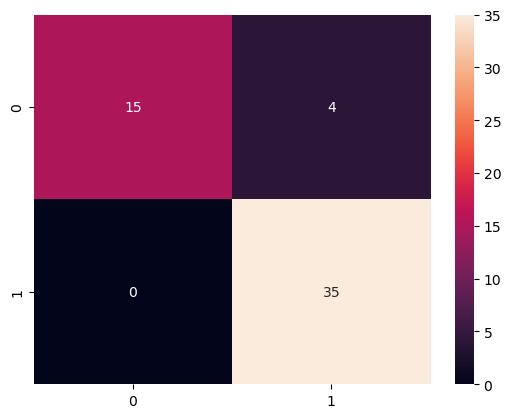

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='.2g')